In [3]:
import numpy as np
import gensim
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize
import multiprocessing
import os
from pathlib import Path
import io
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
input_text= """A window into the soul.For most people, this would be the eyes. The eyes cannot lie; they often tell more about a person's emotions than their words. What distinguishes a fake smile from a genuine one? The eyes. What shows sadness? The eyes. What gives away a liar? The eyes.But are the eyes the only window into the soul?Recently, I began painting with watercolors. With watercolors, there is no turning back: if one section is too dark, it is nearly impossible to lighten the area again. Every stroke must be done purposefully, every color mixed to its exact value.I laid my materials before me, preparing myself for the worst. I checked my list of supplies, making sure my setup was perfect.I wet my brush, dipped it into some yellow ochre, and dabbed off the excess paint. Too little water on my brush. I dipped my brush back into my trusty water jar; the colors swirled beautifully, forming an abstract art piece before my eyes. \u2014It's a shame that I couldn't appreciate it.I continued mixing colors to their exact value. More alizarin crimson. More water. More yellow ochre. Less water. More phthalo blue. The cycle continued. Eventually, I was satisfied. The colors looked good, there was enough contrast between facial features, and the watercolors stayed inside the lines.Craving feedback, I posted my art to Snapchat. I got a few messages such as 'wow' and 'pretty,' but one message stood out. 'You were anxious with this one, huh? Anyways, love the hair!'I was caught off guard. Was it a lucky guess? Did they know something I didn't? I immediately responded: 'Haha, how could you tell?' No response.What I didn't know at the time was that my response would come a few months later while babysitting. Since the girl I was babysitting loved art, I took out some Crayola watercolors and some watercolor paper for her to play with. After I went to the bathroom and came back, the watercolors were doused with water. 'You were impatient with this one, huh? Anyways, love the little dog you drew!'The little girl looked up at me, confused. 'How could you tell?' 'You used a lot of water for a brighter color, but you couldn't wait for it to slowly soak in.''Oh.'Now, I would be lying if I said I realized the connection between the two events immediately.Instead, I made the connection when I decided to sit down one day and objectively critique my art. The piece that I once loved now seemed like a nervous wreck: the paper was overworked, the brushstrokes were undecided, the facial features blended together, and each drop of water was bound inside the lines as if it was a prisoner in a cage.From then on, I started noticing pieces of personality in additional creations surrounding me: website designs, solutions to math problems, code written for class, and even the preparation of a meal.When I peer around at people's projects during Code Club, I notice the clear differences between their code. Some people break it up by commenting in every possible section. Others breeze through the project, not caring to comment or organize their code. I could also see clear differences in personalities when our club members began coding the Arduino for the first time. Some followed the tutorials to the letter, while others immediately started experimenting with different colored LEDs and ways of wiring the circuit.It became clear to me that, as humans, we leave pieces of our souls in everything we do, more than we intend to. If we entertain this thought, perhaps the key to better understanding others around us is simply noticing the subtler clues under our noses?Perhaps there are endless windows to the soul, and we simply need to peer through them. I shakily rose my hand. 'We should create workshops of our own,' I suggested.I got a few strange looks. 'It's a good idea, but it's too much work.' 'We just don't have enough free time to make it work.' 'Maybe we could, but I don't know how to make workshops.' My suggestion was shot down. I shuffled in my seat. 'I could make them.' A few people stared at me in disbelief. I glanced over at the club advisor, Mr. C, nervous to hear his response.'If you're willing to take on the work, we can try it.' Mr. C replied. And so I embarked on my quest. I researched different workshops on the internet, learning the information myself at first. Then, I transitioned into creating workshops of my own, making sure that the information was easy to understand for even a beginner. I was exhausted; my first workshop took 16 cumulative hours to create."""

In [6]:
def setting_anaysis(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #setting을 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    location_list = ['above', 'behind','below','beside','betweed','by','in','inside','near',
                     'on','over','through']
    time_list = ['after', 'before','by','during','from','on','past','since','through','to','until','upon']
      
    movement_list = ['against','along','down','from','into','off','on','onto','out of','toward','up','upon']
    
    palce_terrain_type_list = ['wood', 'forest', 'copse', 'bush', 'trees', 'stand',
                                'swamp', 'marsh', 'wetland', 'fen', 'bog', 'moor', 'heath', 'fells', 'morass',
                                'jungle', 'rainforest', 'cloud forest','plains', 'fields', 'grass', 'grassland', 
                                'savannah', 'flood plain', 'flats', 'prairie','tundra', 'iceberg', 'glacier', 
                                'snowfields','hills', 'highland,' 'heights', 'plateau', 'badland', 'kame', 'shield',
                                'downs', 'downland', 'ridge', 'ridgeline','hollow,' 'valley',' vale','glen', 'dell',
                                'mountain', 'peak', 'summit', 'rise', 'pass', 'notch', 'crown', 'mount', 'switchback',
                                'furth','canyon', 'cliff', 'bluff,' 'ravine', 'gully', 'gulch', 'gorge',
                                'desert', 'scrub', 'waste', 'wasteland', 'sands', 'dunes',
                                'volcano', 'crater', 'cone', 'geyser', 'lava fields']
    
    water_list = ['ocean', 'sea', 'coast', 'beach', 'shore', 'strand','bay', 'port', 'harbour', 'fjord', 'vike',
                  'cove', 'shoals', 'lagoon', 'firth', 'bight', 'sound', 'strait', 'gulf', 'inlet', 'loch', 
                  'bayou','dock', 'pier', 'anchorage', 'jetty', 'wharf', 'marina', 'landing', 'mooring', 'berth', 
                  'quay', 'staith','river', 'stream', 'creek', 'brook', 'waterway', 'rill','delta', 'bank', 'runoff',
                  'channel', 'bend', 'meander', 'backwater','lake', 'pool', 'pond', 'dugout', 'fountain', 'spring', 
                  'watering-hole', 'oasis','well', 'cistern', 'reservoir','waterfall', 'falls', 'rapids', 'cataract', 
                  'cascade','bridge', 'crossing', 'causeway', 'viaduct', 'aquaduct', 'ford', 'ferry','dam', 'dike', 
                  'bar', 'canal', 'ditch','peninsula', 'isthmus', 'island', 'isle', 'sandbar', 'reef', 'atoll', 
                  'archipelago', 'cay','shipwreck', 'derelict']
    
    
    outdoor_places_list = ['clearing', 'meadow', 'grove', 'glade', 'fairy ring','earldom', 'fief', 'shire',
                            'ruin', 'acropolis', 'desolation', 'remnant', 'remains',
                            'henge', 'cairn', 'circle', 'mound', 'barrow', 'earthworks', 'petroglyphs',
                            'lookout', 'aerie', 'promontory', 'outcropping', 'ledge', 'overhang', 'mesa', 'butte',
                            'outland', 'outback', 'territory', 'reaches', 'wild', 'wilderness', 'expanse',
                            'view', 'vista', 'tableau', 'spectacle', 'landscape', 'seascape', 'aurora', 'landmark',
                            'battlefield', 'trenches', 'gambit', 'folly', 'conquest', 'claim', 'muster', 'post',
                            'path', 'road', 'track', 'route', 'highway', 'way', 'trail', 'lane', 'thoroughfare', 'pike',
                            'alley', 'street', 'avenue', 'boulevard', 'promenade', 'esplande', 'boardwalk',
                            'crossroad', 'junction', 'intersection', 'turn', 'corner','plaza', 'terrace', 'square', 
                            'courtyard', 'court', 'park', 'marketplace', 'bazaar', 'fairground','realm', 'land', 'country',
                            'nation', 'state', 'protectorate', 'empire', 'kingdom', 'principality','domain', 'dominion',
                            'demesne', 'province', 'county', 'duchy', 'barony', 'baronetcy', 'march', 'canton']

    
    underground_list = ['pit', 'hole', 'abyss', 'sinkhole', 'crack', 'chasm', 'scar', 'rift', 'trench', 'fissure',
                        'cavern', 'cave', 'gallery', 'grotto', 'karst',
                        'mine', 'quarry', 'shaft', 'vein','graveyard', 'cemetery',
                        'darkness', 'shadow', 'depths', 'void','maze', 'labyrinth'
                        'tomb', 'grave', 'crypt', 'sepulchre', 'mausoleum', 'ossuary', 'boneyard']
                        
    living_places_list = ['nest', 'burrow', 'lair', 'den', 'bolt-hole', 'warren', 'roost', 'rookery', 'hibernaculum',
                         'home', 'rest', 'hideout', 'hideaway', 'retreat', 'resting-place', 'safehouse', 'sanctuary',
                         'respite', 'lodge','slum', 'shantytown', 'ghetto','camp', 'meeting place,' 'bivouac', 'campsite', 
                         'encampment','tepee', 'tent', 'wigwam', 'shelter', 'lean-to', 'yurt','house', 'mansion', 'estate',
                         'villa','hut', 'palace', 'outbuilding', 'shack tenement', 'hovel', 'manse', 'manor', 'longhouse',
                         'cottage', 'cabin','parsonage', 'rectory', 'vicarge', 'friary', 'priory','abbey', 'monastery', 
                         'nunnery', 'cloister', 'convent', 'hermitage','castle', 'keep', 'fort', 'fortress', 'citadel', 
                         'bailey', 'motte', 'stronghold', 'hold', 'chateau', 'outpost', 'redoubt',
                         'town', 'village', 'hamlet', 'city', 'metropolis','settlement', 'commune']

    building_facilities_list = ['temple', 'shrine', 'church', 'cathedral', 'tabernacle', 'ark', 'sanctum', 'parish', 
                                'chapel', 'synagogue', 'mosque','pyramid', 'ziggurat', 'prison', 'jail', 'dungeon',
                                'oubliette', 'hospital', 'hospice', 'stocks', 'gallows','asylum', 'madhouse', 'bedlam',
                                'vault', 'treasury', 'warehouse', 'cellar', 'relicry', 'repository',
                                'barracks', 'armoury','sewer', 'gutter', 'catacombs', 'dump', 'middens', 'pipes', 'baths', 'heap',
                                'mill', 'windmill', 'sawmill', 'smithy', 'forge', 'workshop', 'brickyard', 'shipyard', 'forgeworks',
                                'foundry','bakery', 'brewery', 'almshouse', 'counting house', 'courthouse', 'apothecary', 'haberdashery', 'cobbler',
                                'garden', 'menagerie', 'zoo', 'aquarium', 'terrarium', 'conservatory', 'lawn', 'greenhouse',
                                'farm', 'orchard', 'vineyard', 'ranch', 'apiary', 'farmstead', 'homestead',
                                'pasture', 'commons', 'granary', 'silo', 'crop','barn', 'stable', 'pen', 'kennel', 'mews', 'hutch', 
                                'pound', 'coop', 'stockade', 'yard', 'lumber yard','tavern', 'inn', 'pub', 'brothel', 'whorehouse',
                                'cathouse', 'discotheque','lighthouse', 'beacon','amphitheatre', 'colosseum', 'stadium', 'arena', 
                                'circus','academy', 'university', 'campus', 'college', 'library', 'scriptorium', 'laboratory', 
                                'observatory', 'museum']
    
    
    architecture_list = ['hall', 'chamber', 'room','nave', 'aisle', 'vestibule',
                        'antechamber', 'chantry', 'pulpit','dome', 'arch', 'colonnade',
                        'stair', 'ladder', 'climb', 'ramp', 'steps',
                        'portal', 'mouth', 'opening', 'door', 'gate', 'entrance', 'maw',
                        'tunnel', 'passage', 'corridor', 'hallway', 'chute', 'slide', 'tube', 'trapdoor',
                        'tower', 'turret', 'belfry','wall', 'fortifications', 'ramparts', 'pallisade', 'battlements',
                        'portcullis', 'barbican','throne room', 'ballroom','roof', 'rooftops', 'chimney', 'attic',
                        'loft', 'gable', 'eaves', 'belvedere','balcony', 'balustrade', 'parapet', 'walkway', 'catwalk',
                        'pavillion', 'pagoda', 'gazebo','mirror', 'glass', 'mere','throne', 'seat', 'dais',
                        'pillar', 'column', 'stone', 'spike', 'rock', 'megalith', 'menhir', 'dolmen', 'obelisk',
                        'statue', 'giant', 'head', 'arm', 'leg', 'body', 'chest', 'body', 'face', 'visage', 'gargoyle', 'grotesque',
                        'fire', 'flame', 'bonfire', 'hearth', 'fireplace', 'furnace', 'stove','window', 'grate', 'peephole', 
                        'arrowslit', 'slit', 'balistraria', 'lancet', 'aperture', 'dormerl']
    
    
    setting_words_filter_list = location_list + time_list + movement_list + palce_terrain_type_list + water_list + outdoor_places_list + underground_list + underground_list + living_places_list + building_facilities_list + architecture_list

    
    ####문장에 setting_words_filter_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_setting_text = []
    for k in token_input_text:
        for j in setting_words_filter_list:
            if k == j:
                filtered_setting_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_setting_text_ = set(filtered_setting_text) #중복제거
    filtered_setting_text__ = list(filtered_setting_text_) #다시 리스트로 변환
    print (filtered_setting_text__) # 중복값 제거 확인
    
    for i in filtered_setting_text__:
        ext_setting_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    setting_total_count = len(filtered_setting_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 setting 표현 수
    setting_count_ = len(filtered_setting_text__) #중복제거된 setting표현 총 수
        
    result_setting_words_ratio = round(setting_total_count/total_words * 100, 2)
    return result_setting_words_ratio, total_sentences, total_words, setting_total_count, setting_count_, ext_setting_sim_words_key


In [7]:
setting_anaysis(input_text) # 문장에서 키워드와 관련된 단어을 모두 추출하면 이런 결과가 나옴, 이 결과를 모두 합쳐서 setting 총 값 계산해서 숫자로 출력

['on', 'from', 'over', 'after', 'since', 'off', 'down', 'by', 'inside', 'through', 'up', 'to', 'window', 'into', 'workshop', 'before', 'during', 'seat', 'in']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


(8.37,
 60,
 932,
 78,
 19,
 [('souls', 0.9708173274993896),
  ('leave', 0.9701206684112549),
  ('humans', 0.9677554368972778),
  ('everything', 0.9673895835876465),
  ('pieces', 0.9630201458930969),
  ('additional', 0.9628270268440247),
  ('creations', 0.9595156311988831),
  ('personality', 0.9593289494514465),
  ('do', 0.9580982327461243),
  ('surrounding', 0.9541059732437134)])

In [8]:
df = setting_anaysis((input_text))
df_ = pd.DataFrame(df, index = [
                                'setting ratio','total sentences', 'toral words', 'setting_total_count',
                                'ext_setting_words_no', 'ext_setting_sim_words_samples'
                                ], columns = ['Value']
                  )
                     
df_ # 이 겨래과에서는 92라는 숫자만 의미가 있지 >>> 총 문장에 setting를 표현한 수가 총 몇개인지 추출한 결과

['on', 'from', 'over', 'after', 'since', 'off', 'down', 'by', 'inside', 'through', 'up', 'to', 'window', 'into', 'workshop', 'before', 'during', 'seat', 'in']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


,Value
setting ratio,8.37
total sentences,60
toral words,932
setting_total_count,78
ext_setting_words_no,19
ext_setting_sim_words_samples,"[(souls, 0.9708173274993896), (leave, 0.970120..."


In [9]:
################ setting analysis 끝!!! ################

In [10]:
#캐릭터 표현하는 단어들을 리스트에 넣어서 필터로 만들고
character_list = ['i', 'my', 'me', 'mine', 'you', 'your', 
                  'yours', 'he','him','his' 'she','her']
#하나씩 꺼내서 유사한 단어를 찾아내서 새로운 리스트에 담아서 출력,
ext_characters = []
for i in character_list:
    chr_sim_words = text.similar(i)
    ext_characters.append(chr_sim_words)

ext_characters

NameError: name 'text' is not defined

#품사 달기
tagged_list = pos_tag(word_tokenize(input_text))
tagged_list

#extract noun
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

In [11]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

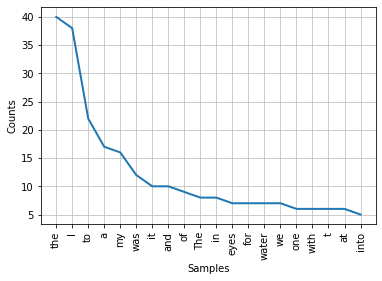

In [12]:
from nltk import Text
text = Text(retokenize.tokenize(input_text))
text.plot(20)
plt.show()


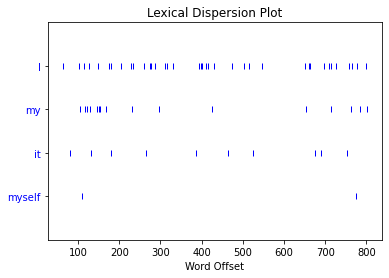

In [13]:
text.dispersion_plot(["I", "my", "it", "myself"])

In [46]:
#유사한 단어 추출, 여기서는 it을 가지고 추출해봄
simlilar_words = text.similar("it")
simlilar_words

her


In [27]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(input_text))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [32]:
#가장 많이 사용한 단어 Top 5
fd_names.most_common(10)

[('Anyways', 2),
 ('C', 2),
 ('Every', 1),
 ('Too', 1),
 ('Less', 1),
 ('Craving', 1),
 ('Snapchat', 1),
 ('Was', 1),
 ('Did', 1),
 ('Haha', 1)]

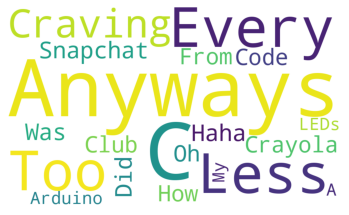

In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()